# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [2]:
# импорт библиотек
import time
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold,
                                     cross_val_predict)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import (silhouette_score, roc_auc_score, confusion_matrix, classification_report, precision_recall_fscore_support)
from sklearn.metrics.cluster import adjusted_mutual_info_score
from xgboost import XGBClassifier

%matplotlib inline

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.max_columns', None)

# загрузка датасета
df = pd.read_csv('telecom_users.csv', float_precision='high')

# просмотр первых 5 строк датасета
df.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.1,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.2,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.0,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.9,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.5,119.5,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [24]:
df.churn.value_counts()

No     4399
Yes    1587
Name: churn, dtype: int64

&nbsp;&nbsp;&nbsp;В загруженном датасете содержится всего 26% клиентов, отмеченных Churn=Yes (ушли/отток) и 74% клиентов, которые продолжают пользоваться услугами компании. Такое распределение свидетельствует о несбалансированности датасета и будущая модель может плохо предсказывать клиентов склонных к оттоку
<br><br>
&nbsp;&nbsp;&nbsp;Данные нуждаются в трансформации и, возможно, в стандартизации, т.к. в переменных много категорий в текстовом формате. 
<br><br>
&nbsp;&nbsp;&nbsp;Не исключено, что есть выбросы и распределение данных далеко от нормы.
<br><br>
&nbsp;&nbsp;&nbsp;Колонка 'TotalCharges', в которой числа с типом float определяются как object, а также прочие категории необходимо будет перевести в числа. 
<br><br>
&nbsp;&nbsp;&nbsp;Первая колонка "Unnamed: 0" отсутствует в описании, просмотр информации содержащейся в данной колонке наводит на мысль о том, что информация не несёт в себе полезности для дальнейшего обучения модели и данную колонку необходимо удалить. Также придется убрать колонку customerID, т.к. её невозможно трансформировать в формат полезный для обучения модели. Практичнее использовать индекс строк, вместо данного уникального ключа.

In [57]:
df[df['churn']=='Yes'].groupby(['contract', 'seniorcitizen']).contract.value_counts()

contract        seniorcitizen  contract      
Month-to-month  0              Month-to-month    1026
                1              Month-to-month     372
One year        0              One year           120
                1              One year            28
Two year        0              Two year            39
                1              Two year             2
Name: contract, dtype: int64

Значительная доля клиентов отказывающихся от услуг оператора заключали длительные контракты с ежемесячной пролонгацией. Аудитория непенсионного возраста более склонна к оттоку.

In [59]:
df[df['churn']=='Yes'].corr()

,index,seniorcitizen,tenure,monthlycharges,totalcharges,tenure_year,mean_monhtchargers,median_monthlycharges,median_totalcharges
index,1.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
seniorcitizen,-0.0,1.0,0.1,0.1,0.1,0.1,0.1,-0.0,0.0
tenure,0.0,0.1,1.0,0.4,1.0,1.0,0.4,0.2,0.7
monthlycharges,0.0,0.1,0.4,1.0,0.6,0.4,1.0,-0.2,0.3
totalcharges,0.0,0.1,1.0,0.6,1.0,1.0,0.6,0.2,0.8
tenure_year,0.0,0.1,1.0,0.4,1.0,1.0,0.4,0.2,0.7
mean_monhtchargers,0.0,0.1,0.4,1.0,0.6,0.4,1.0,-0.2,0.3
median_monthlycharges,0.0,-0.0,0.2,-0.2,0.2,0.2,-0.2,1.0,0.3
median_totalcharges,0.0,0.0,0.7,0.3,0.8,0.7,0.3,0.3,1.0


На данном этапе исследования данных можно отметить, что срок пользования услугами, ежемесячные расходы и общая сумма расходов лучше всего коррелируют с признаком оттока. Возникает предположение, что клиенты начинают уходить в другие телекоммуникационные компании, где более выгодные условия обслуживания, например, дешевле ежемесячное обслуживание.

In [3]:
# Переведем загловки столбцов в нижний регистр
df.columns = map(str.lower, df.columns)

# удаляем колонку 'Unnamed: 0', вместо нее добвляем индексы срок
df = df.drop(['unnamed: 0', 'customerid'], axis=1).reset_index()

# преобразование 'TotalCharges' в числовой формат и заполняем пропуски медианным значением
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df = df.fillna(df['totalcharges'].agg('mean'))

# добавляем новые фичи 
df['tenure_year'] = df.tenure/12 # срок пользования услугами связи в годах
df['mean_monhtchargers'] = df['totalcharges'] / df['tenure'] # средняя величина расходов клиента на услуги связи
df['median_monthlycharges'] = abs(df['monthlycharges'] - df['monthlycharges'].median()) # медианное значение месячных расходов
df['median_totalcharges'] = abs(df['totalcharges'] - df['totalcharges'].median()) # медианное значение годовых расходов

# проверка результата
df.totalcharges.info()

df.head(3)
df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5986 entries, 0 to 5985
Series name: totalcharges
Non-Null Count  Dtype  
--------------  -----  
5986 non-null   float64
dtypes: float64(1)
memory usage: 46.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  5986 non-null   int64  
 1   gender                 5986 non-null   object 
 2   seniorcitizen          5986 non-null   int64  
 3   partner                5986 non-null   object 
 4   dependents             5986 non-null   object 
 5   tenure                 5986 non-null   int64  
 6   phoneservice           5986 non-null   object 
 7   multiplelines          5986 non-null   object 
 8   internetservice        5986 non-null   object 
 9   onlinesecurity         5986 non-null   object 
 10  onlinebackup           5986 non-null   object 
 11  d

In [11]:
# сводка по числовым атрибутам
df.describe()

,index,seniorcitizen,tenure,monthlycharges,totalcharges,tenure_year,mean_monhtchargers,median_monthlycharges,median_totalcharges
count,5986.0,5986.0,5986.0,5986.0,5986.0,5986.0,5986.0,5986.0,5986.0
mean,2992.5,0.2,32.5,64.8,2298.1,2.7,inf,25.9,1784.9
std,1728.2,0.4,24.5,30.1,2272.2,2.0,NaN,16.4,1660.5
min,0.0,0.0,0.0,18.2,18.8,0.0,13.8,0.0,0.1
25%,1496.2,0.0,9.0,35.6,406.3,0.8,36.5,11.5,664.6
50%,2992.5,0.0,29.0,70.4,1414.6,2.4,70.5,24.1,1232.9
75%,4488.8,0.0,56.0,89.9,3841.5,4.7,90.4,41.1,2426.9
max,5985.0,1.0,72.0,118.8,8684.8,6.0,inf,52.2,7270.2


По полю tenure видно, что есть пул клиентов, с нулевым месяцем, их можно считать новыми клиентами. 25% клиентов пользуются услугами почти год, половина аудитории использует услуги более 2 лет, и 75% выборки верны компании на протяжении 5 лет.

In [10]:
# сводка по колонкам с типом "object"
df.describe(include=[object])

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


Можно отметить, что срок взаимодействия клиента с компанией (tenure), по минимальной шкале, находится в значении - 1 год. Датасет не располагает гибкостью, поэтому новые клиенты не обозначены конкретным периодом пользования услугами связи. Можно, в дальнейшем, отбросить данную категорию клиентов если большая часть остаётся пользоваться услугами связи.

In [34]:
labels = ['tenure', 'monthlycharges', 'totalcharges']

for l in labels:
    print(f"Часто встречающиеся значения {l}:\n", df[l].value_counts(sort=False).nlargest(10), '\n')

Часто встречающиеся значения tenure:
 1     510
72    308
2     194
3     169
4     154
71    152
5     111
7     111
8     110
10    102
Name: tenure, dtype: int64 

Часто встречающиеся значения monthlycharges:
 20.1    50
19.9    40
19.7    39
19.6    37
19.9    36
19.6    35
20.2    34
19.8    34
20.1    33
19.8    33
Name: monthlycharges, dtype: int64 

Часто встречающиеся значения totalcharges:
 2298.1    10
20.2      10
19.8       8
19.6       7
20.1       6
19.9       6
19.6       5
45.3       5
20.2       5
20.3       5
Name: totalcharges, dtype: int64 



Создам отдельный датафрейм, в котором категориальные данные приведены к бинарным с помощью pd.get_dummies(). Возможно, модель будет точнее предсказывать отток, если ва датасете будет больше бинарных фичей.

In [4]:
# сохраняю данные об индексах и customerid
reserve_data = df[['index', 'churn']]

# создаю датафрейм, в котором категориальные признаки переведены в бинарный формат и возвращаем customerid датафрейму
df_dummies = pd.get_dummies(df).merge(reserve_data, how='left', left_on='index', right_on='index')
df_dummies['target'] = df_dummies.churn.eq('Yes').mul(1)
df_dummies.drop(['churn', 'churn_No', 'churn_Yes'], axis=1, inplace=True)

df_dummies = df_dummies.replace([np.inf, -np.inf], np.nan)
df_dummies = df_dummies.dropna()

df_dummies.shape
df_dummies.head(5)

,index,seniorcitizen,tenure,monthlycharges,totalcharges,tenure_year,mean_monhtchargers,median_monthlycharges,median_totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,target
0,0,0,72,24.1,1734.7,6.0,24.1,46.3,320.1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0
1,1,0,44,88.2,3973.2,3.7,90.3,17.8,2558.6,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
2,2,1,38,75.0,2869.8,3.2,75.5,4.5,1455.3,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1
3,3,0,4,55.9,238.5,0.3,59.6,14.5,1176.1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0
4,4,0,2,53.5,119.5,0.2,59.8,17.0,1295.1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0


Так же создам отдельный датафрейм созданный с помощью трансформатора LabelEncoder. Хочу сравнить результаты обучения моделей на датасетах с разной методикой трансформации данных с типом object в категориальный числовой формат.

In [5]:
from sklearn.preprocessing import LabelEncoder

df_le = df.copy()

# создание списка названий колонок с категориальными данными
cat_list = list(df.drop(['index','seniorcitizen', 'tenure',
                    'monthlycharges', 'totalcharges', 'mean_monhtchargers', 'median_monthlycharges', 'median_totalcharges'],
                        axis=1))

# запуск цикла преобразования категориальных колонок
for c in cat_list:
  df_le[c] = LabelEncoder().fit_transform(df_le[c])

df_le = df_le.replace([np.inf, -np.inf], np.nan)
df_le = df_le.dropna()

# просмотр итогов трансформации
df_le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  5976 non-null   int64  
 1   gender                 5976 non-null   int32  
 2   seniorcitizen          5976 non-null   int64  
 3   partner                5976 non-null   int32  
 4   dependents             5976 non-null   int32  
 5   tenure                 5976 non-null   int64  
 6   phoneservice           5976 non-null   int32  
 7   multiplelines          5976 non-null   int32  
 8   internetservice        5976 non-null   int32  
 9   onlinesecurity         5976 non-null   int32  
 10  onlinebackup           5976 non-null   int32  
 11  deviceprotection       5976 non-null   int32  
 12  techsupport            5976 non-null   int32  
 13  streamingtv            5976 non-null   int32  
 14  streamingmovies        5976 non-null   int32  
 15  cont

In [48]:
df_le.head(5)

,index,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,mean_monhtchargers,median_monthlycharges,median_totalcharges
0,0,7010-BRBUU,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.1,1734.7,0,24.1,46.3,320.1
1,1,9688-YGXVR,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.2,3973.2,0,90.3,17.8,2558.6
2,2,9286-DOJGF,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,75.0,2869.8,1,75.5,4.5,1455.3
3,3,6994-KERXL,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.9,238.5,0,59.6,14.5,1176.1
4,4,2181-UAESM,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.5,119.5,0,59.8,17.0,1295.1


# 2. Исследование зависимостей и формулирование гипотез

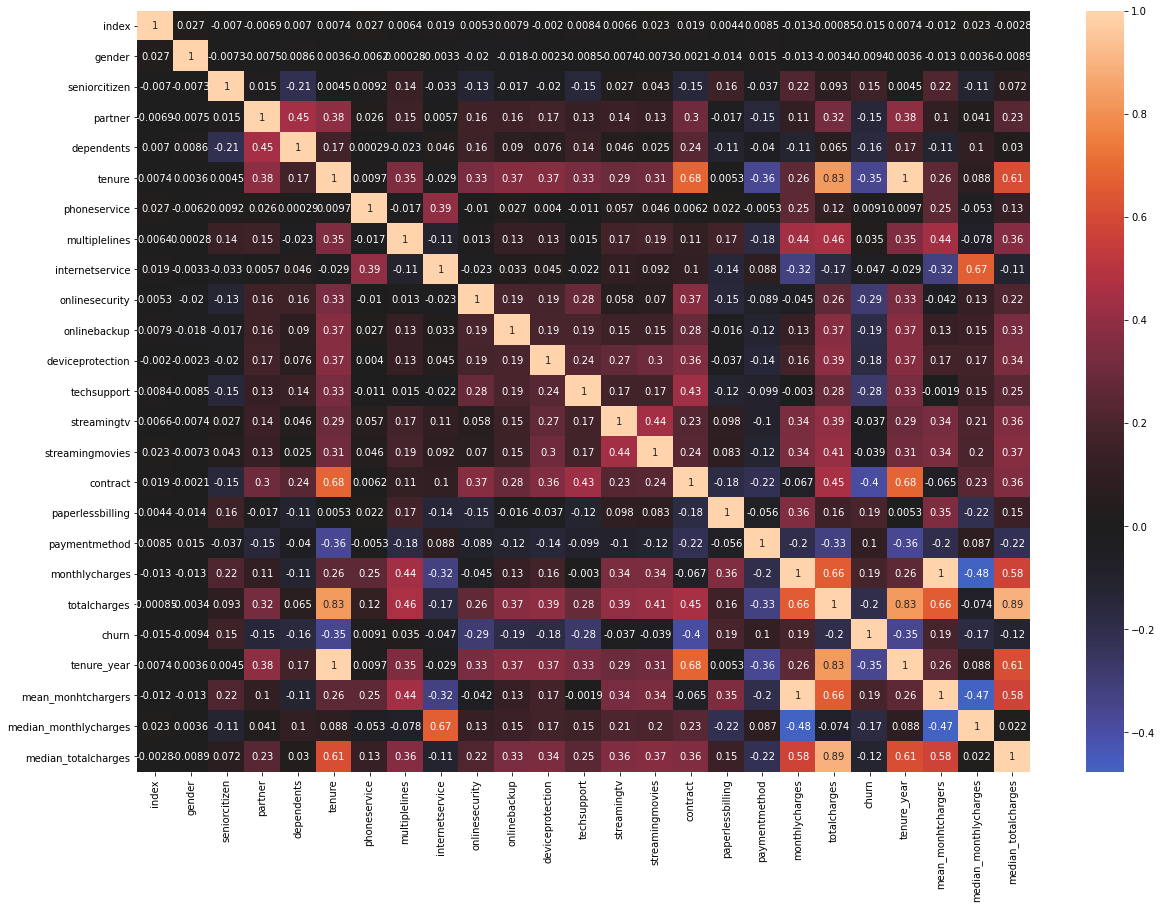

In [47]:
plt.figure(figsize = (20, 14))
sns.heatmap(df_le.corr(), center=0, annot=True)

plt.show()

&nbsp;&nbsp;&nbsp;По полученным данным тепловой карты можно отметить следующие признаки, которые коррелируют друг с другом: seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, contract, paperlessbilling, monthlycharges, totalcharges, mean_monhtchargers, median_monthlycharges, median_totalcharges. 
<br><br>
&nbsp;&nbsp;&nbsp;Касательно корреляции признака оттока прослеживается взаимосвязь с признаками seniorcitizen, paperlessbilling, paymentmethod, monthlycharges и totalcharges. Необходимо рассмотреть более детально аудиторию, которая отказалась от услуг компании.

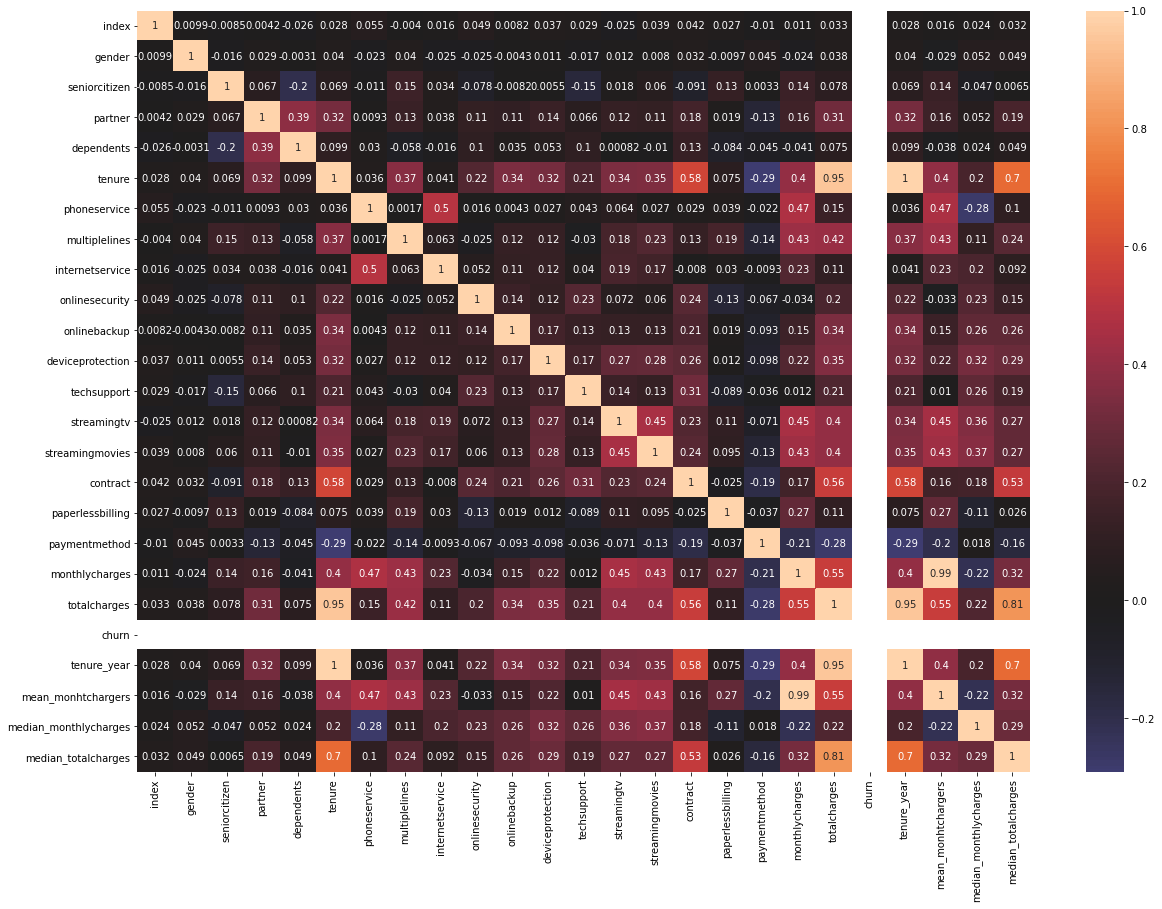

In [51]:
plt.figure(figsize = (20, 14))
sns.heatmap(df_le[df_le['churn']==1].corr(), center=0, annot=True)

plt.show()

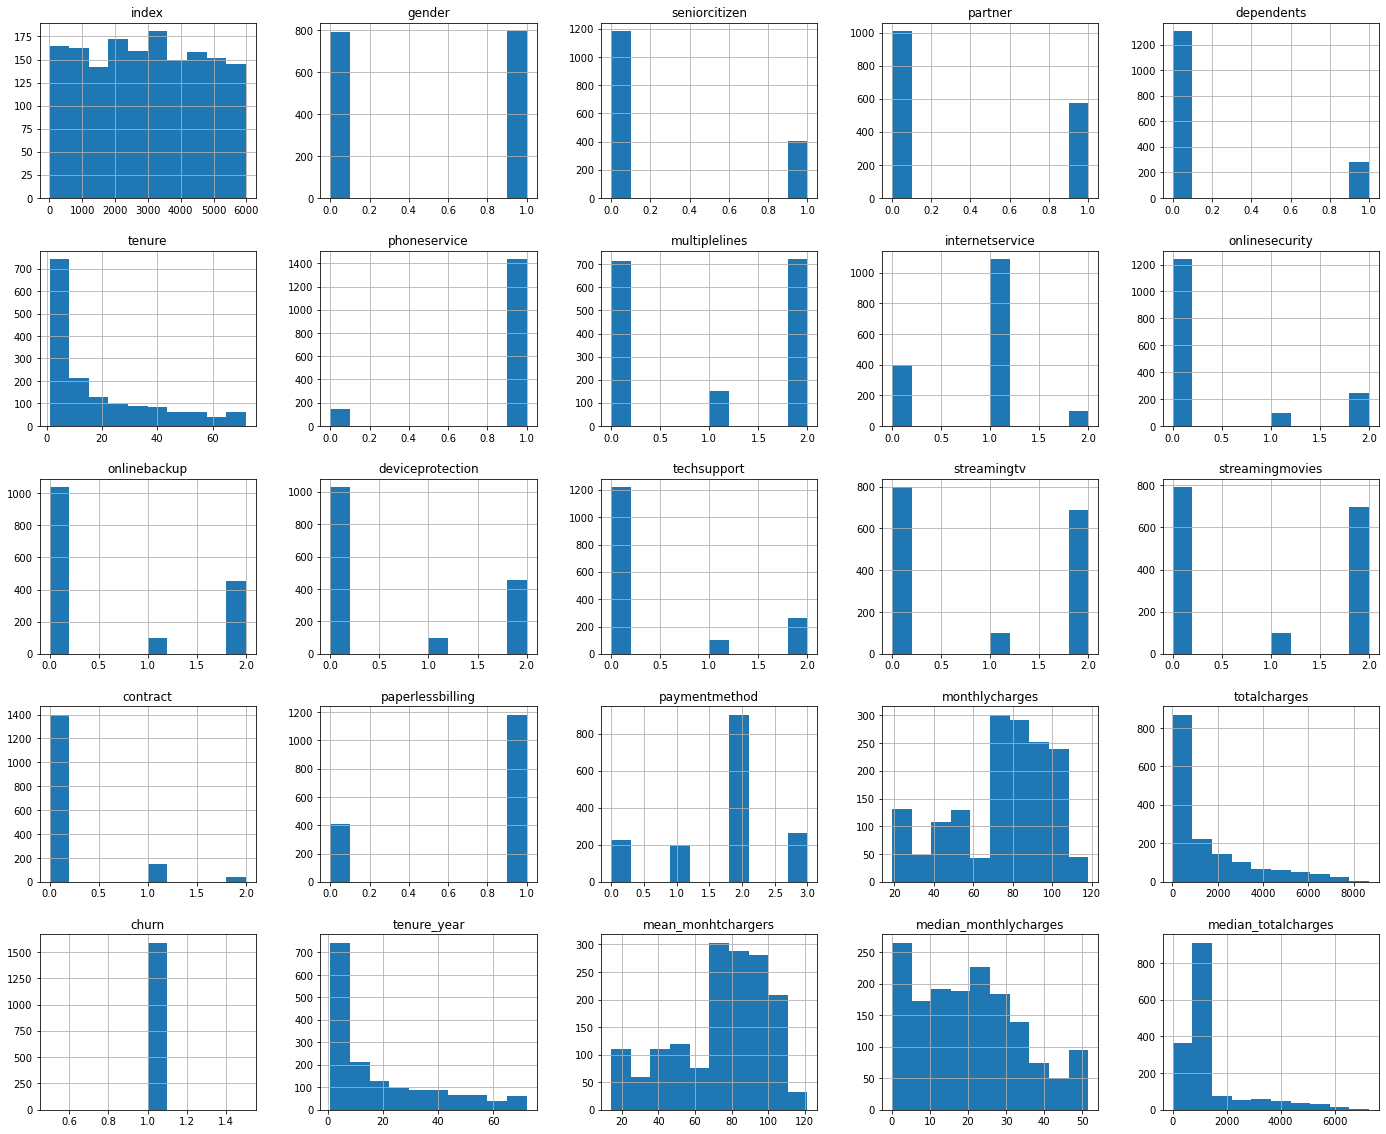

In [81]:
df_le[df_le['churn']==1].hist(figsize=(24.0, 20.0))
plt.show()

&nbsp;&nbsp;&nbsp;Изучив граффик корреляции признаков по аудитории ушедших клиентов отмечу взаимосвязь с признаками срока пользования услугами, наличием подключенных различных сервисов, типом контракта, службой поддержки и расходами на услуги. Стоит отметить, что общая сумма расходов выражено коррелирует с признаком срока пользования. 
<br><br>
&nbsp;&nbsp;&nbsp;Основываясь на этих данных могу сделать предположение о том, что клиенты уходят по причине невыгодных услуг (дорого или не качественно, либо отсутствие каких либо сервисов): стримингового телевидения, стримингового кинотеатра, телефонной связи, возможности просматривать записанные ранее ТВ-передачи и семейное положение.
<br><br>
&nbsp;&nbsp;&nbsp;Сопоставив данные по корреляции с графиком по сроку пользования услугами оператора можно отметить, что чаще всего отказываются от услуг компании в 1-2 года пользования услугами, больше всего в течение 10 месяцев.
<br><br>
&nbsp;&nbsp;&nbsp;Для прогнозирования оттока применю стекинг из различных моделей.


# 3. Построение моделей для прогнозирования оттока

In [6]:
# создаю несколько датасетов для моделей
data_le = df_le.copy()
data_dum = df_dummies.copy()

print(data_le.shape,data_dum.shape)

(5976, 25) (5976, 51)


# Обучение моделей на датасете созданым с помощью LabelEncoder

In [61]:
#%%time

# формирование списка моделей
estimators = [('gbc', GradientBoostingClassifier(n_estimators=100, subsample=0.5, 
                                                 min_samples_leaf=25, max_features='auto',
                                                 learning_rate=0.1, random_state=42)),
              ('rfc', RandomForestClassifier(n_estimators=100, min_samples_leaf=5)), 
              ('svc', SVC()), 
                      ('lr', LogisticRegression()), 
              ('knc', KNeighborsClassifier()), 
              ('gbn', GaussianNB())]

final_estimator = XGBClassifier(n_estimators=500,
                                eta=0.1,
                                min_child_weight=1,
                                subsample=0.1)

estimators2 = [('lin_reg', LinearRegression()),
              ('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('knr', KNeighborsRegressor(n_neighbors=20, metric='euclidean'))]
                

final_estimator2 = GradientBoostingRegressor(n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,
                                             random_state=42)

stack_classifier = StackingClassifier(estimators=estimators,
                                      final_estimator=final_estimator)

stack_regressor = StackingRegressor(estimators=estimators2,
                                    final_estimator=final_estimator2)

x = data_le.drop('churn', axis=1)
y = data_le.churn

# выполню стандартизацию для сглаживания данных
x = StandardScaler().fit_transform(x)

# разделение данных на тренировочную и валидационную выборку
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.25,
                                                    random_state=42)


def all_scores(model, y_pred, y_true):
    name_of_model = model
    ras = roc_auc_score(y_true, y_pred)
    cmat = confusion_matrix(y_true, y_pred)
    crep = classification_report(y_true, y_pred)
    # введу константу D для округления оценки
    D = 2
    print('{}: \nRoc auc score: {}\nConfusion matrix:\n{}\nClass report:\n{}'.format(name_of_model,
          np.round(ras, D), cmat, crep))

In [64]:
stack_cl = stack_classifier.fit(x_train, y_train)

stack_classifier.fit(x_train, y_train)

StackingClassifier(estimators=[('gbc',
                                GradientBoostingClassifier(max_features='auto',
                                                           min_samples_leaf=25,
                                                           random_state=42,
                                                           subsample=0.5)),
                               ('rfc',
                                RandomForestClassifier(min_samples_leaf=5)),
                               ('svc', SVC()), ('lr', LogisticRegression()),
                               ('knc', KNeighborsClassifier()),
                               ('gbn', GaussianNB())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callback...
                                                 gamma=None, gpu_id=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=1,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=500, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=None,
                                                 reg_alpha=None, ...))

In [70]:
print(stack_cl.score(x_train,y_train), stack_cl.score(x_test,y_test))

0.8172690763052208 0.7737617135207496


In [73]:
all_scores(stack_cl, stack_cl.predict(x_train), y_train)

StackingClassifier(estimators=[('gbc',
                                GradientBoostingClassifier(max_features='auto',
                                                           min_samples_leaf=25,
                                                           random_state=42,
                                                           subsample=0.5)),
                               ('rfc',
                                RandomForestClassifier(min_samples_leaf=5)),
                               ('svc', SVC()), ('lr', LogisticRegression()),
                               ('knc', KNeighborsClassifier()),
                               ('gbn', GaussianNB())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callback...
                                                 gamma=None, gpu_id=None,
                                                 grow_policy=None,
                                                 import

Как отмечал ранее, изначальный датасет не сбалансирован по классам (churn). По классу "0" можно отметить хорошую точность и полноту, а по классу "1" (отток) модель показыват более худший результат.
<br><br>
Необходимо сбалансировать датасет с помощью метода over sampling и заново обучить модели для получения более лучшего скора.

In [76]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

X_resampled_s, y_resampled_s = SMOTE().fit_resample(x, y)

print(sorted(Counter(y_resampled_s).items()))

X_resampled_a, y_resampled_a = ADASYN().fit_resample(x, y)
print(sorted(Counter(y_resampled_a).items()))

[(0, 4389), (1, 4389)]
[(0, 4389), (1, 4422)]


In [77]:
# разделение данных на тренировочную и валидационную выборку
x_train, x_test, y_train, y_test = train_test_split(X_resampled_s, y_resampled_s,
                                                    train_size=0.25,
                                                    random_state=42)

stack_cl2 = stack_classifier.fit(x_train, y_train)
print(stack_cl.score(x_train,y_train), stack_cl.score(x_test,y_test))

0.886052871467639 0.7938942891859052


In [78]:
all_scores(stack_cl2, stack_cl2.predict(x_train), y_train)

StackingClassifier(estimators=[('gbc',
                                GradientBoostingClassifier(max_features='auto',
                                                           min_samples_leaf=25,
                                                           random_state=42,
                                                           subsample=0.5)),
                               ('rfc',
                                RandomForestClassifier(min_samples_leaf=5)),
                               ('svc', SVC()), ('lr', LogisticRegression()),
                               ('knc', KNeighborsClassifier()),
                               ('gbn', GaussianNB())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callback...
                                                 gamma=None, gpu_id=None,
                                                 grow_policy=None,
                                                 import

Балансировка датасета помогла повысить точность предсказания по обоим классам

In [79]:
# разделение данных на тренировочную и валидационную выборку
x_train, x_test, y_train, y_test = train_test_split(X_resampled_a, y_resampled_a,
                                                    train_size=0.25,
                                                    random_state=42)

stack_cl2 = stack_classifier.fit(x_train, y_train)
print(stack_cl.score(x_train,y_train), stack_cl.score(x_test,y_test))

0.8841961852861036 0.7989105764866091


In [80]:
all_scores(stack_cl2, stack_cl2.predict(x_train), y_train)

StackingClassifier(estimators=[('gbc',
                                GradientBoostingClassifier(max_features='auto',
                                                           min_samples_leaf=25,
                                                           random_state=42,
                                                           subsample=0.5)),
                               ('rfc',
                                RandomForestClassifier(min_samples_leaf=5)),
                               ('svc', SVC()), ('lr', LogisticRegression()),
                               ('knc', KNeighborsClassifier()),
                               ('gbn', GaussianNB())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callback...
                                                 gamma=None, gpu_id=None,
                                                 grow_policy=None,
                                                 import

In [68]:
stack_reg = stack_regressor.fit(x_train, y_train)
stack_regressor.fit(x_train, y_train)

StackingRegressor(estimators=[('lin_reg', LinearRegression()),
                              ('ridge', RidgeCV()),
                              ('lasso', LassoCV(random_state=42)),
                              ('knr',
                               KNeighborsRegressor(metric='euclidean',
                                                   n_neighbors=20))],
                  final_estimator=GradientBoostingRegressor(max_features=1,
                                                            min_samples_leaf=25,
                                                            n_estimators=25,
                                                            random_state=42,
                                                            subsample=0.5))

In [69]:
stack_reg.score(x_train,y_train)

0.325190365302487

Стекинг с регрессорами показывает очень плохой результат

# Обучение моделей на датасете созданым с помощью pd.get_dummies()

In [81]:
x = data_dum.drop('target', axis=1)
y = data_dum.target

# выполню стандартизацию для сглаживания данных
x = StandardScaler().fit_transform(x)

X_resampled_s, y_resampled_s = SMOTE().fit_resample(x, y)

# разделение данных на тренировочную и валидационную выборку
x_train, x_test, y_train, y_test = train_test_split(X_resampled_s, y_resampled_s,
                                                    train_size=0.25,
                                                    random_state=42)

stack_cl2 = stack_classifier.fit(x_train, y_train)
print(stack_cl.score(x_train,y_train), stack_cl.score(x_test,y_test))

0.8874202370100274 0.8133353584447145


In [82]:
all_scores(stack_cl2, stack_cl2.predict(x_train), y_train)

StackingClassifier(estimators=[('gbc',
                                GradientBoostingClassifier(max_features='auto',
                                                           min_samples_leaf=25,
                                                           random_state=42,
                                                           subsample=0.5)),
                               ('rfc',
                                RandomForestClassifier(min_samples_leaf=5)),
                               ('svc', SVC()), ('lr', LogisticRegression()),
                               ('knc', KNeighborsClassifier()),
                               ('gbn', GaussianNB())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callback...
                                                 gamma=None, gpu_id=None,
                                                 grow_policy=None,
                                                 import

Результат по второму датасету (с большим количеством фичей) незначительно лучше чем по предыдущему.

# 4. Сравнение качества моделей 

In [ ]:
### YOUR CODE HERE ###


